# Importar librerias 
La librerias necesarias son:   
<b>Pandas</b> para <i>leer el dataset</i> y hacer el data frame  
<b>Numpy</b> para <i>realizar operaciones matemáticas</i> con matrices  
<b>Seaborn</b> para <i>hacer el gráfico</i> de violín  
<b>OS</b> para <i>acceder a archivos</i> del sistema 

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re

# Leer datos
Primero vamos a leer solo un archivo .txt ubicado en la dirección que se pasa como parametro a la función pd.read_csv. Con esta función es posible leer archivos en formato de tabla, separados por algo particular (en este caso ":")

In [62]:
#en la variable data vamos a guardar el contenido del archivo SU16_SE1_Ax+.txt, que se encuentra en la ubicación
#/home/yan/datos_ratas_tesis_doctorado/ENTRENAMIENTO/Grupo_Ax/ de un sistema Linux
data = pd.read_csv("/home/yan/datos_ratas_tesis_doctorado/ENTRENAMIENTO/Grupo_Ax/SU16_SE1_Ax+.txt", sep = ': ', engine='python', keep_default_na=False,
                       na_values=[' '])

#convertimos la variable en una variable de tipo DataFrame de Pandas
data = pd.DataFrame(data)

#nombramos las dos columnas del DataFrame
data.columns=['Numero', 'Dato']

#imprimimos los 10 primeros datos del DataFrame
data.head(10)

,Numero,Dato
0,Start Date,06/06/19
1,End Date,06/06/19
2,Subject,1
3,Experiment:,None
4,Group,Ax
5,Box,1
6,Start Time,13:36:24
7,End Time,14:10:28
8,MSN,COMPUESTO_RL+
9,A,164.000


# Ubicar el dato específico
En este caso, el dato que se requiere es el que tiene el índice 9 en el DataFrame, que son las <b>respuestas totales</b> que dio el sujeto en la sesión

In [63]:
#en la variable respuestas guardamos el dato que se encuentra en el índice 9 de la columna Dato del DataFrame
#lo guardamos como tipo float
respuestas = float(data.loc[9:9]['Dato'])

#imprimimos la variable respuestas
print(respuestas)

164.0


# Guardar todos los archivos de la carpeta
Hasta ahora hemos leído un dato de un solo archivo, pero muchas veces queremos leer ese mismo dato de varios archivos (en este caso son las respuestas totales de todos los sujetos). Para hacer lo anterior usaremos la función "ordenar" que recibe como parámetro una ubicación y ordena alfabéticamente su contenido.  

In [65]:
def ordenar(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

#se obtiene una lista ordenada con todos los archivos que están en la ubicación
contenido_Ax = ordenar(os.listdir("/home/yan/datos_ratas_tesis_doctorado/ENTRENAMIENTO/Grupo_Ax/"))

# Leer el dato de todos los archivos
Ahora leeremos el mismo dato de todos los archivos de la carpeta. Este dato lo guardaremos en una matriz de dimensión 10x10 (ya que son 10 sesiones por cada sujeto).

In [66]:
#creamos la matriz donde guardaremos los datos
total = np.zeros((10,10))

ruta = "/home/yan/datos_ratas_tesis_doctorado/ENTRENAMIENTO/Grupo_Ax/"
i = 0
j = 0

#con un ciclo for repetiremos lo que hemos hecho para un solo archivo, pero ahora para todos los que se encuentren
#en la lista ordenada contenido_Ax
for elemento in contenido_Ax:
    archivo = ruta + elemento
    data = pd.read_csv(archivo, sep = ': ', engine='python', keep_default_na=False,
                       na_values=[' '])
    data = pd.DataFrame(data)
    data.columns=['Numero', 'Dato']
    respuestas = float(data.loc[9:9]['Dato'])
    
    total[i][j] = respuestas
    j += 1
    if j == 10:
        i += 1
        j = 0

#imprimimos la matriz con todos los datos
print(total)    

[[164. 108.  32. 262. 216. 418. 294. 351. 385. 358.]
 [279. 343. 444. 335. 489. 506. 527. 631. 634. 513.]
 [126. 138. 280. 231. 189. 129. 151. 138. 173. 167.]
 [291. 280. 271. 166. 201. 143. 102.  98.  72.  87.]
 [165. 283. 152. 127.  76.  56.  44.  44.  59.  62.]
 [302. 375. 365. 223. 172. 141. 170. 115. 145. 144.]
 [428. 369. 186. 211. 193. 229. 194. 150. 121. 127.]
 [ 18.  35.  26.  27.  72. 143. 177. 178. 147.  96.]
 [ 72.  78.  34.  72. 136. 159. 144. 304. 203. 171.]
 [365. 225. 179. 202. 270. 256. 494. 428. 498. 592.]]


# Graficar
Ahora graficaremos los datos guardados en la matriz "total" en un gráfico de violín

[[164. 108.  32. 262. 216. 418. 294. 351. 385. 358.]
 [279. 343. 444. 335. 489. 506. 527. 631. 634. 513.]
 [126. 138. 280. 231. 189. 129. 151. 138. 173. 167.]
 [291. 280. 271. 166. 201. 143. 102.  98.  72.  87.]
 [165. 283. 152. 127.  76.  56.  44.  44.  59.  62.]
 [302. 375. 365. 223. 172. 141. 170. 115. 145. 144.]
 [428. 369. 186. 211. 193. 229. 194. 150. 121. 127.]
 [ 18.  35.  26.  27.  72. 143. 177. 178. 147.  96.]
 [ 72.  78.  34.  72. 136. 159. 144. 304. 203. 171.]
 [365. 225. 179. 202. 270. 256. 494. 428. 498. 592.]]


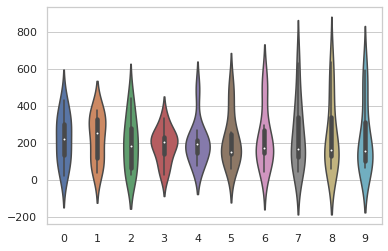

In [67]:
sns.set(style="whitegrid")
ax = sns.violinplot(data=total)
print(total)

[126. 138. 280. 231. 189. 129. 151. 138. 173. 167.]
172.2


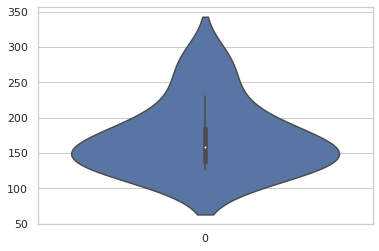

In [68]:
sns.set(style="whitegrid")
sujeto = 2
ax = sns.violinplot(data=total[sujeto][:])
print(total[sujeto][:])
print(np.mean(total[sujeto][:]))